In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
    

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Last date in the df is: ('2017-08-23', 0.0)
One year ago from last data point would be: 2016-08-23


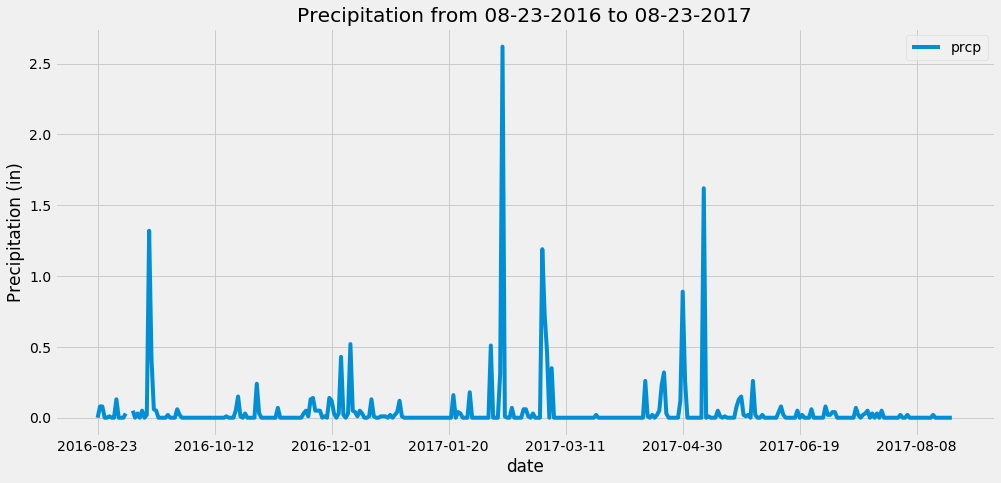

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date, Measurement.prcp).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).first()
print("Last date in the df is: " + str(last_date))

# Calculate the date 1 year ago from the last data point in the database
one_yr_ago = "2016-08-23"
print(f"One year ago from last data point would be: {one_yr_ago}")

# Perform a query to retrieve the data and precipitation scores
last_12 = session.query(Measurement.date, Measurement.prcp).\
    group_by(Measurement.date).\
    filter(Measurement.date >= one_yr_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_df = pd.DataFrame(last_12)
last_12_df = last_12_df.set_index('date')

# Sort the dataframe by date
last_12_df = last_12_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (15,7))
last_12_df.plot(ax = ax)
ax.set_title("Precipitation from 08-23-2016 to 08-23-2017")
ax.set_ylabel("Precipitation (in)")
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_df.describe()


,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [12]:
# Design a query to show how many stations are available in this dataset?
how_many = session.query(Station.station).distinct().count()
print(f"There are {how_many} stations in the dataset")


There are 9 stations in the dataset


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_df = pd.DataFrame(most_active, columns=['station','count'])
most_active_df = most_active_df.set_index('station')

most_active_df

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = most_active[0][0]

stats_most_active = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

low_temp = stats_most_active[0][0]
high_temp = stats_most_active[0][1]
avg_temp = stats_most_active[0][2]

print(f"The lowest temp recorded at {most_active_station} is {low_temp}")
print(f"The highest temp recorded at {most_active_station} is {high_temp}")
print(f"The average temp recorded at {most_active_station} is {round(avg_temp,1)}")


The lowest temp recorded at USC00519281 is 54.0
The highest temp recorded at USC00519281 is 85.0
The average temp recorded at USC00519281 is 71.7


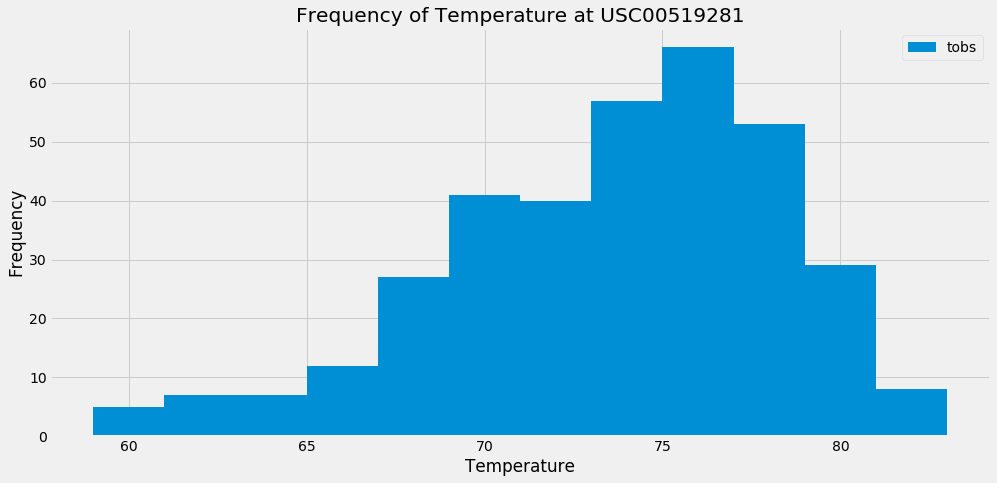

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
all_above = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_yr_ago).\
    filter(Measurement.station == most_active_station).all()

all_above_df = pd.DataFrame(all_above)
all_above_df = all_above_df.set_index('date')

fig, ax = plt.subplots(figsize=(15,7))
all_above_df.plot(kind='hist', bins=12, ax=ax)
ax.set_title(f'Frequency of Temperature at {most_active_station}')
ax.set_xlabel('Temperature')
plt.show()
